In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv("C:\Users\Psycho Doc\Downloads\estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition\ObesityDataSet_raw_and_data_sinthetic.csv")

# Display basic information about the dataset
print(df.info())
print("\nSample data:")
print(df.head())
print("\nTarget variable distribution:")
print(df['NObeyesdad'].value_counts(normalize=True))

FileNotFoundError: [Errno 2] No such file or directory: 'ObesityDataSet_raw_and_data_sinthetic.csv'

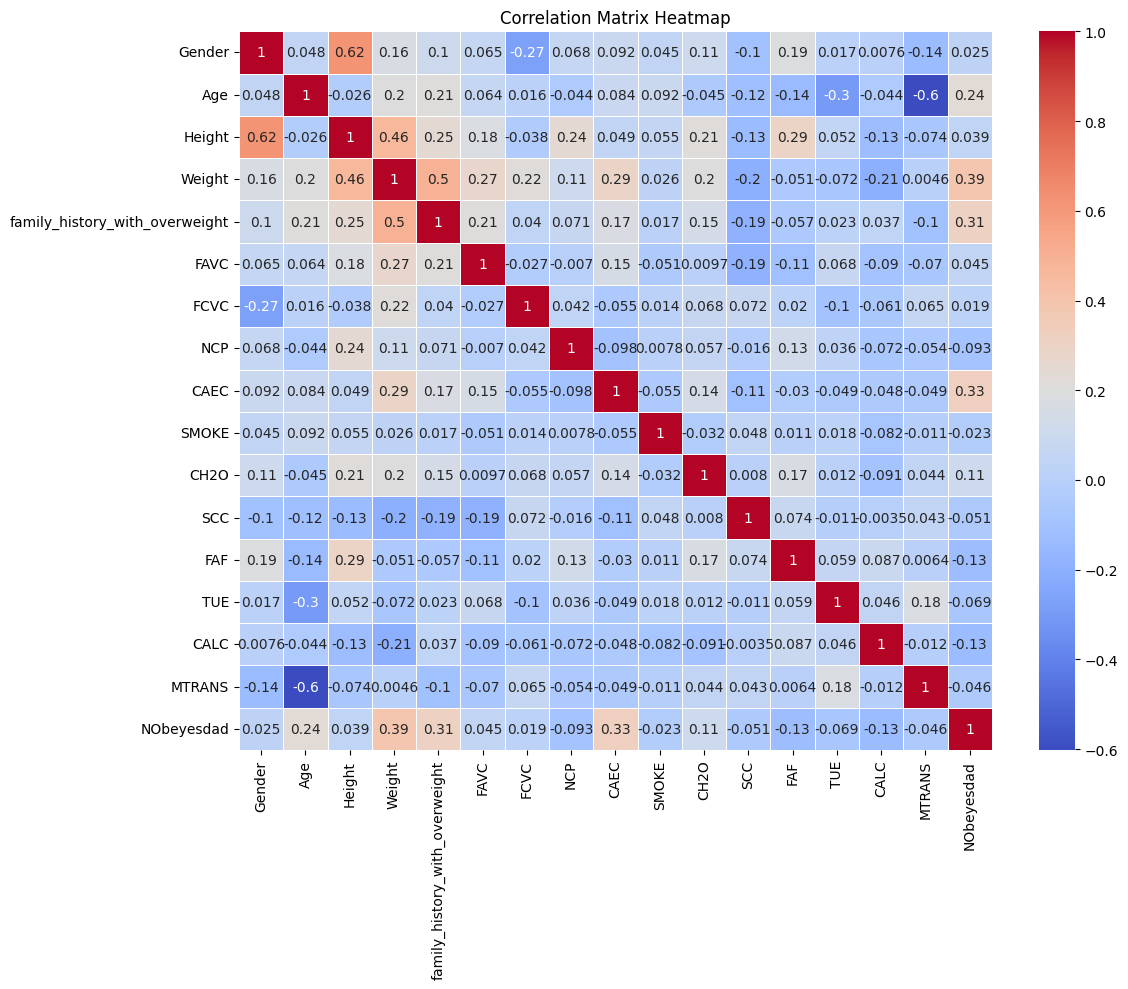

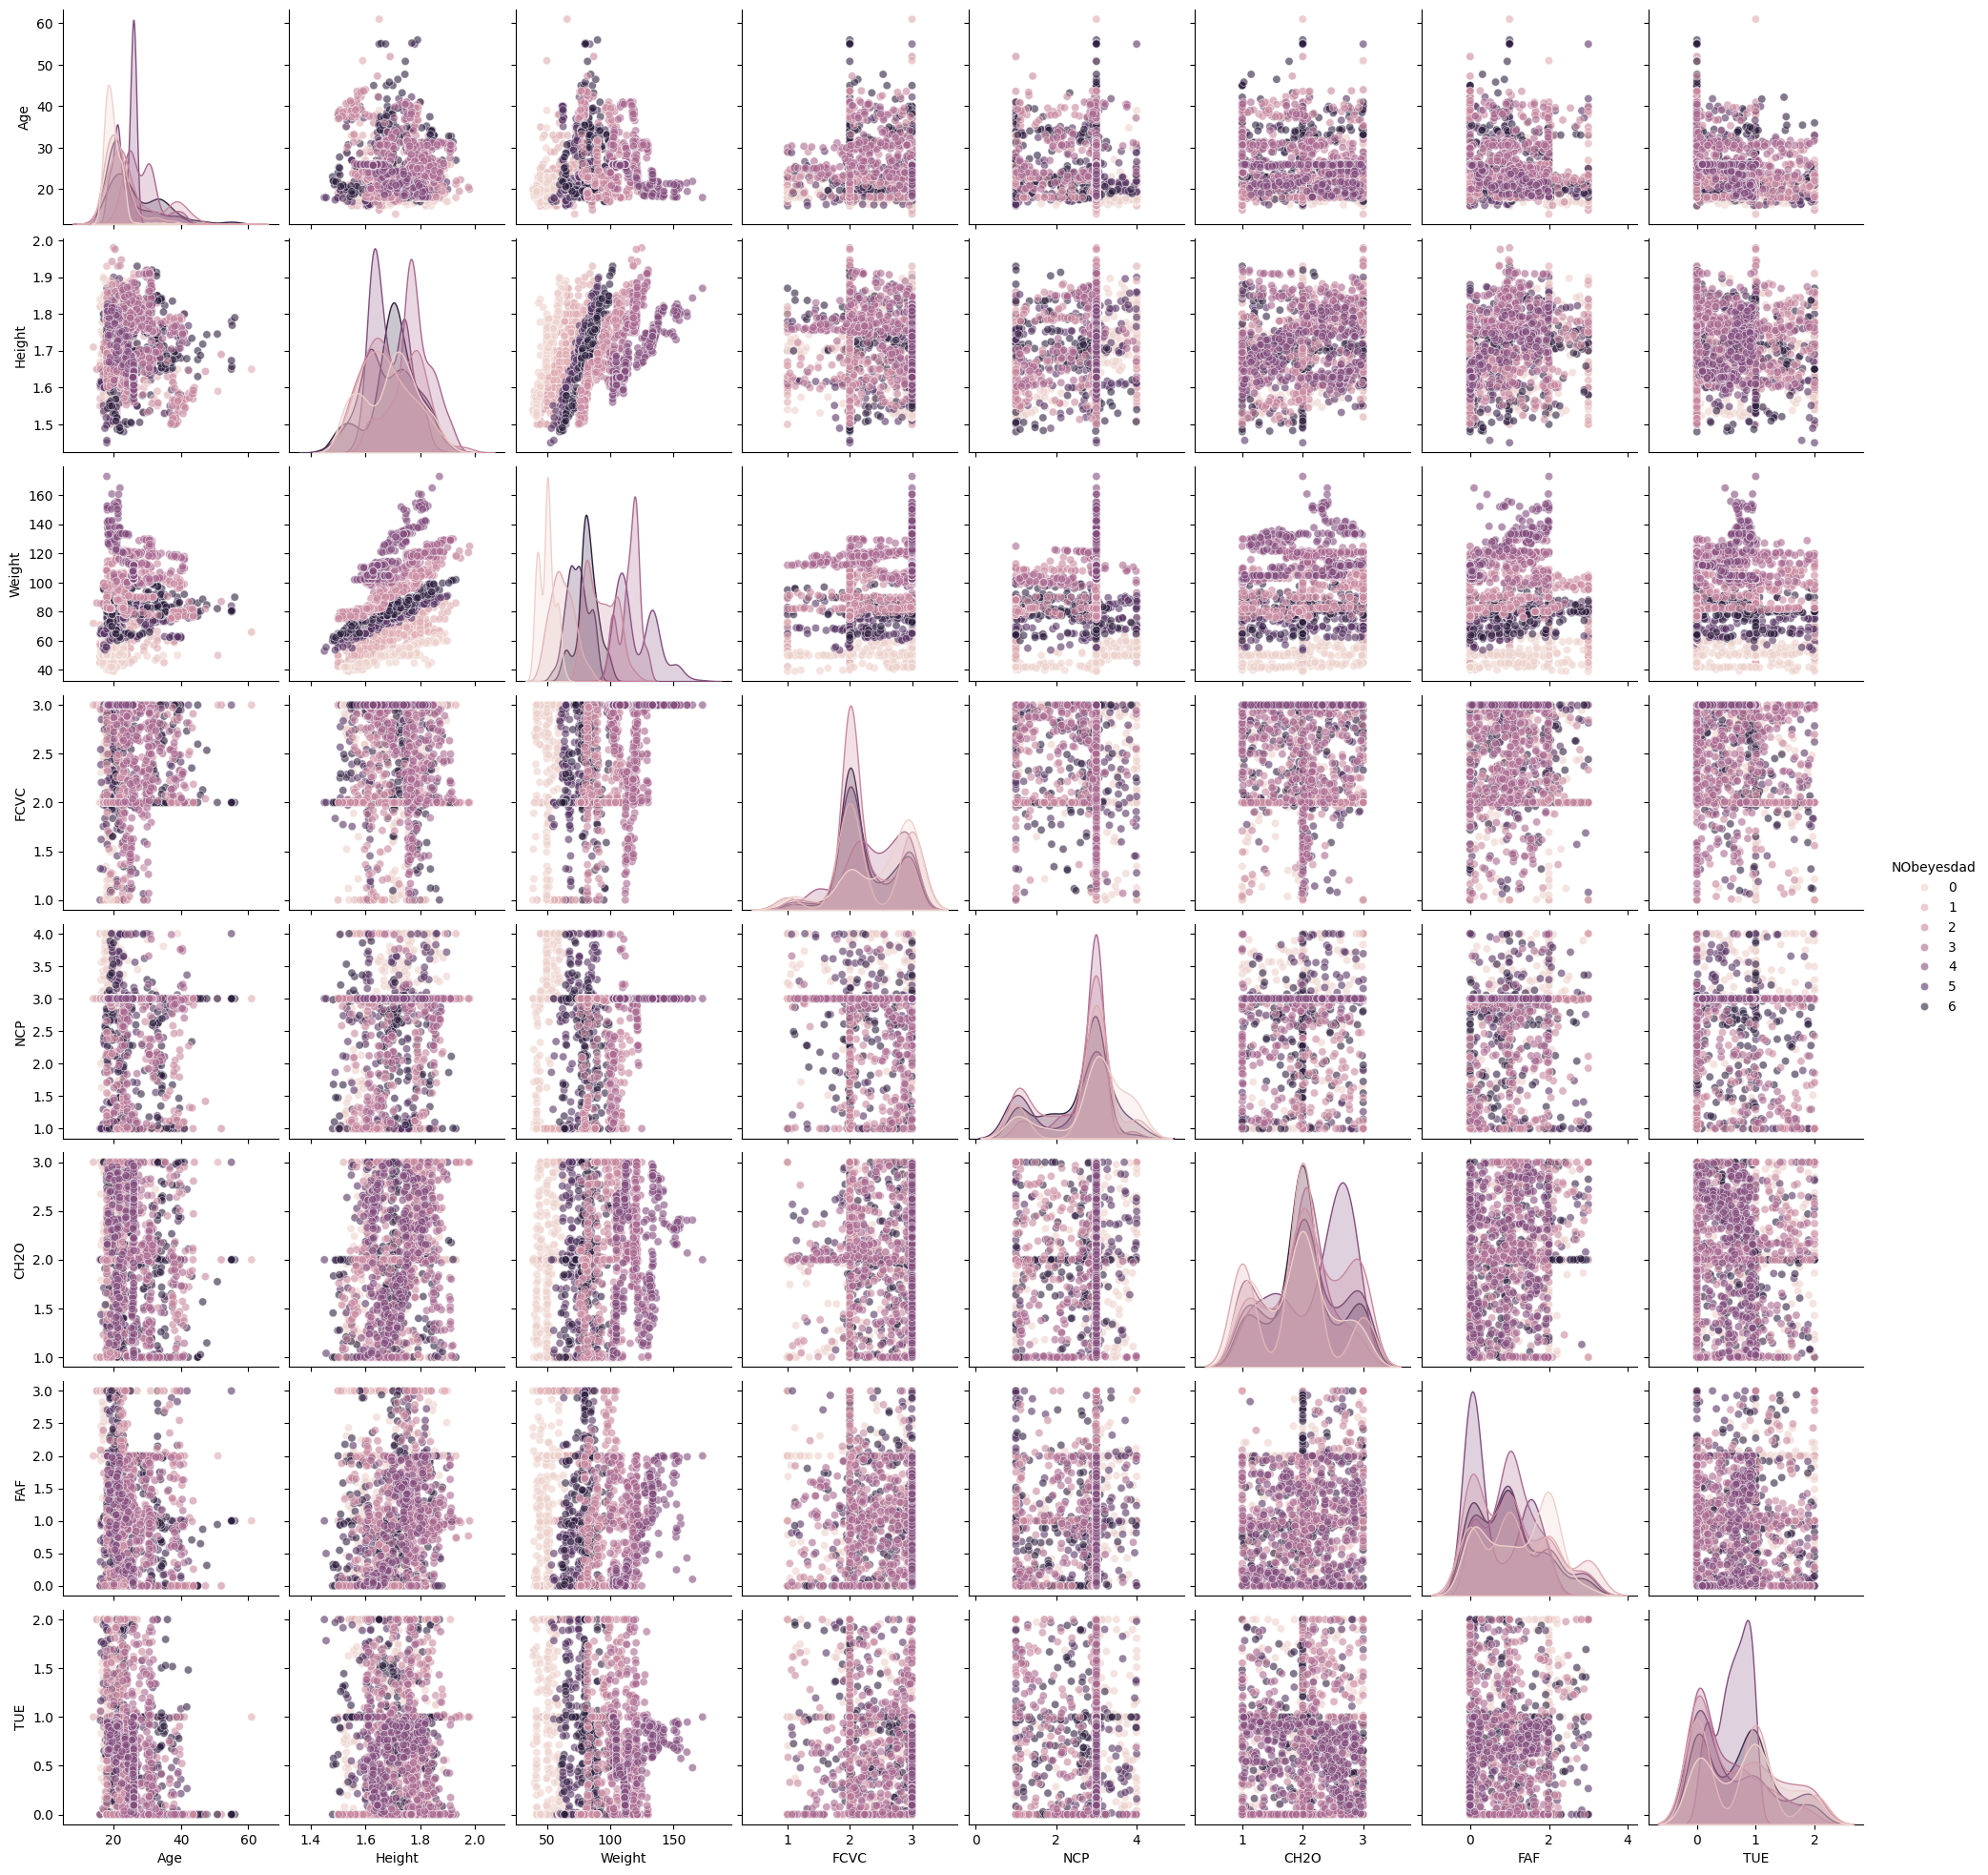

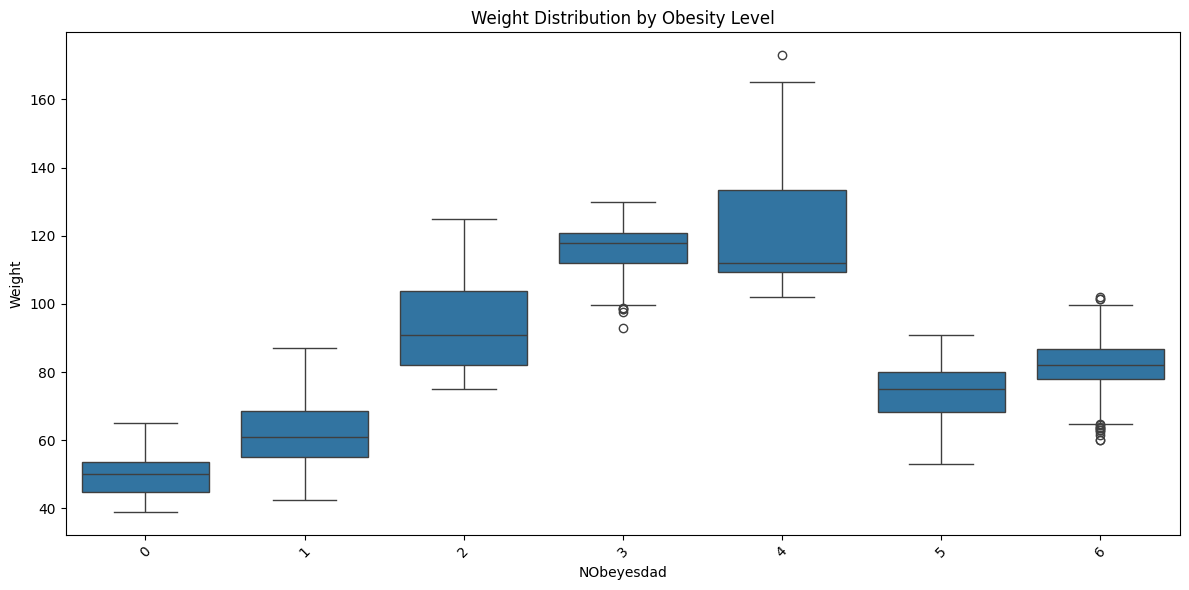

Correlation matrix, pairplot, and boxplot

Summary Statistics:
            Gender          Age       Height       Weight  \
count  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.505921    24.312600     1.701677    86.586058   
std       0.500083     6.345968     0.093305    26.191172   
min       0.000000    14.000000     1.450000    39.000000   
25%       0.000000    19.947192     1.630000    65.473343   
50%       1.000000    22.777890     1.700499    83.000000   
75%       1.000000    26.000000     1.768464   107.430682   
max       1.000000    61.000000     1.980000   173.000000   

       family_history_with_overweight         FAVC         FCVC          NCP  \
count                     2111.000000  2111.000000  2111.000000  2111.000000   
mean                         0.817622     0.883941     2.419043     2.685628   
std                          0.386247     0.320371     0.533927     0.778039   
min                          0.000000     0.000000     1.000000    

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Read the CSV file
df = pd.read_csv(r"C:\Users\Psycho Doc\Downloads\estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition\ObesityDataSet_raw_and_data_sinthetic.csv")

# Encode categorical variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Compute correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()  # Display the heatmap


# Create pairplot for numerical variables
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
sns.pairplot(df[numerical_cols + ['NObeyesdad']], hue='NObeyesdad', plot_kws={'alpha': 0.6})
plt.savefig('pairplot.png')
plt.show()  # Display the pairplot


# Create boxplot for Weight vs NObeyesdad
plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y='Weight', data=df)
plt.title('Weight Distribution by Obesity Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('weight_boxplot.png')
plt.show()  # Display the boxplot


print("Correlation matrix, pairplot, and boxplot")

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Display correlation with target variable
print("\nCorrelation with NObeyesdad:")
print(corr_matrix['NObeyesdad'].sort_values(ascending=False))

Linear Regression Results:
Mean Squared Error: 1.9714449164132755
R-squared Score: 0.5055609119735154


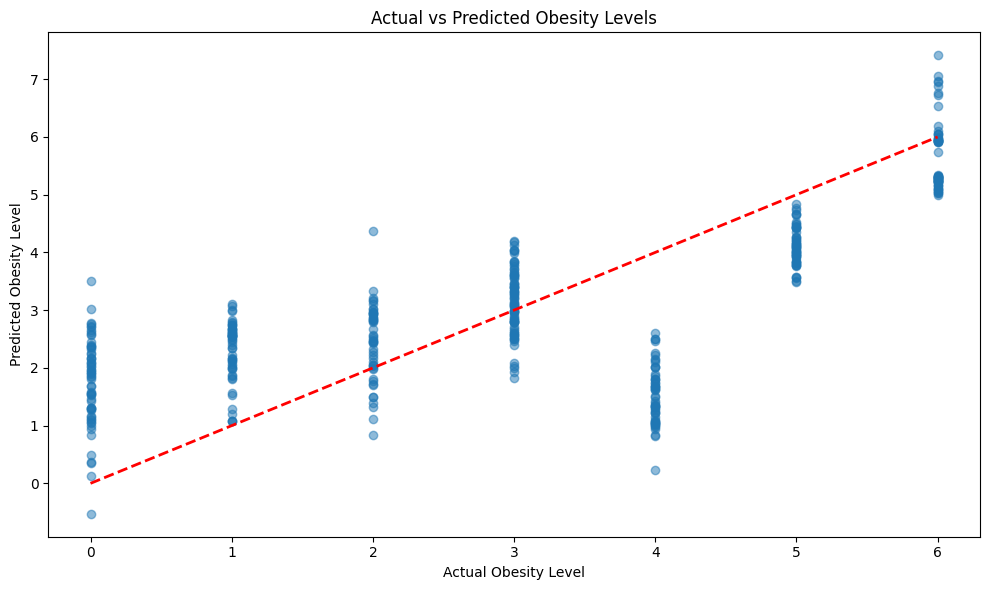

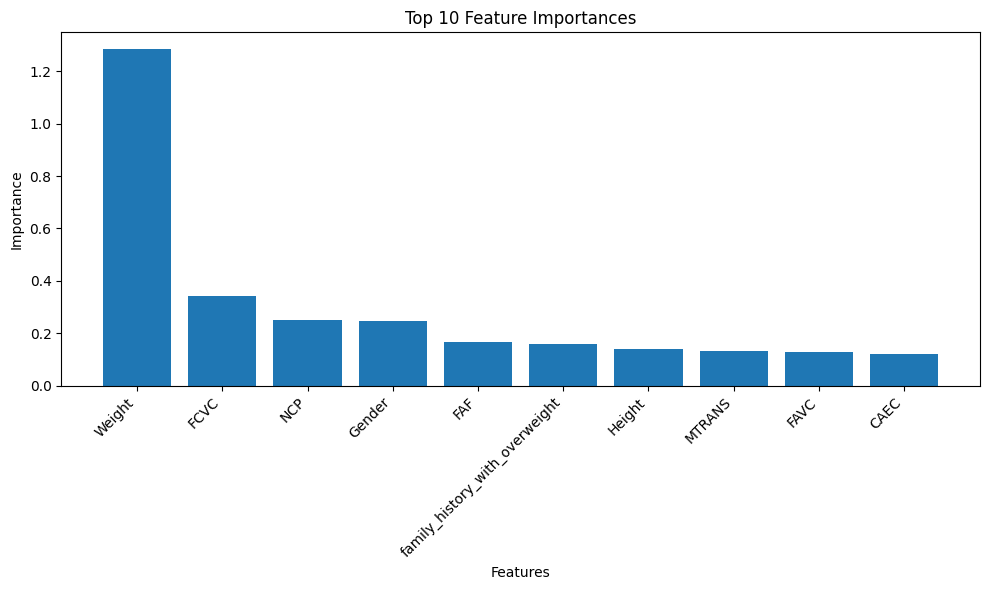

Actual vs Predicted plot and Feature Importance plot have been Displayed above

Top 10 Feature Importances:
                           feature  importance
3                           Weight    1.284474
6                             FCVC    0.342489
7                              NCP    0.252247
0                           Gender    0.248000
12                             FAF    0.164909
4   family_history_with_overweight    0.159177
2                           Height    0.140363
15                          MTRANS    0.133445
5                             FAVC    0.126822
8                             CAEC    0.121429


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(r"C:\Users\Psycho Doc\Downloads\estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition\ObesityDataSet_raw_and_data_sinthetic.csv")

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = pd.factorize(df[col])[0]

# Prepare features and target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Obesity Level")
plt.ylabel("Predicted Obesity Level")
plt.title("Actual vs Predicted Obesity Levels")
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

print("Actual vs Predicted plot and Feature Importance plot have been Displayed above")
print("\nTop 10 Feature Importances:")
print(feature_importance)

In [14]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict with SVM
svm_pred = svm_model.predict(X_test_scaled)

# SVM metrics
svm_conf_matrix = confusion_matrix(y_test, svm_pred)
svm_class_report = classification_report(y_test, svm_pred)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)


# Predict with Decision Tree
dt_pred = dt_model.predict(X_test_scaled)

# Decision Tree metrics
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
dt_class_report = classification_report(y_test, dt_pred)

print("SVM Confusion Matrix:")
print(svm_conf_matrix)
print("\nSVM Classification Report:")
print(svm_class_report)

print("Decision Tree Confusion Matrix:")
print(dt_conf_matrix)
print("\nDecision Tree Classification Report:")
print(dt_class_report)

SVM Confusion Matrix:
[[51  5  0  0  6  0  0]
 [ 0 53  3  0  0  0  0]
 [ 0  2 48  0  0  0  0]
 [ 0  0  1 76  0  1  0]
 [ 0  0  0  0 56  0  0]
 [ 0  0  0  0  0 58  0]
 [ 0  0  0  0  0  0 63]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        62
           1       0.88      0.95      0.91        56
           2       0.92      0.96      0.94        50
           3       1.00      0.97      0.99        78
           4       0.90      1.00      0.95        56
           5       0.98      1.00      0.99        58
           6       1.00      1.00      1.00        63

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423

Decision Tree Confusion Matrix:
[[53  3  0  0  6  0  0]
 [ 2 54  0  0  0  0  0]
 [ 0  2 47  1  0  0  0]
 [ 0  0  2 72  0  4  0]
 [ 1  0  0  0 55  0  0]
 [ 0  0  0  3  0 55  0]
 [ 0  0 

Silhouette Scores:
K-means: 0.1625
HAC: 0.1194
DBSCAN: -0.2361


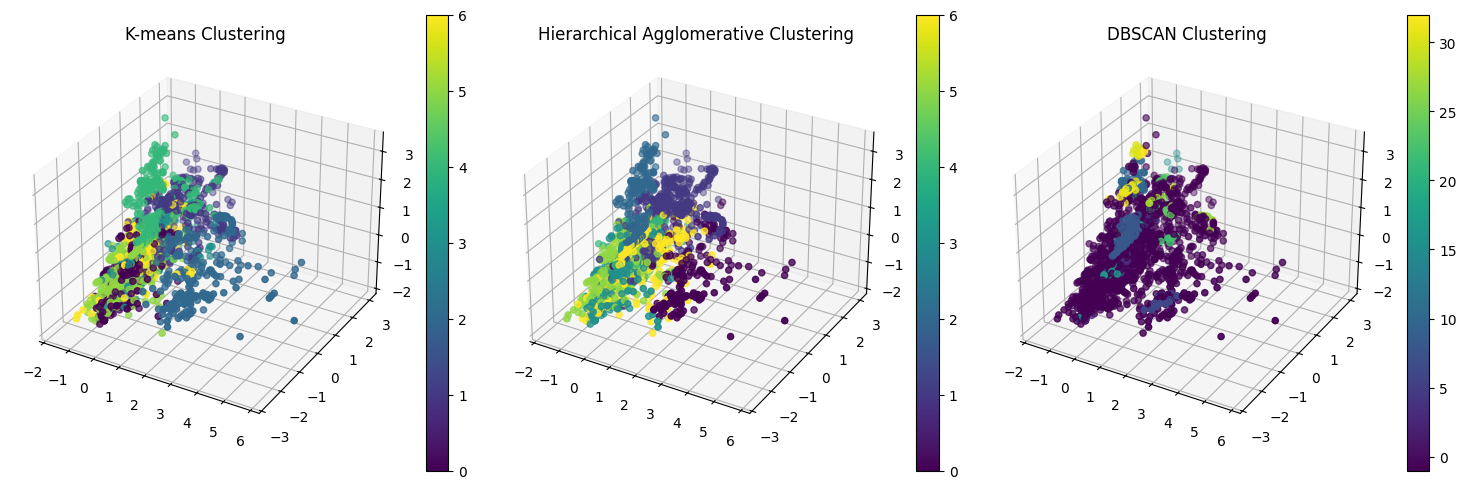


Cluster Distributions:
     K-means    HAC  DBSCAN
-1       NaN    NaN    1597
 0     266.0  219.0      11
 1     336.0  508.0       5
 2     231.0  267.0      10
 3     324.0  253.0       9
 4     384.0  256.0       9
 5     293.0  314.0      19
 6     277.0  294.0      17
 7       NaN    NaN       5
 8       NaN    NaN     178
 9       NaN    NaN       7
 10      NaN    NaN      56
 11      NaN    NaN       6
 12      NaN    NaN       7
 13      NaN    NaN       7
 14      NaN    NaN       5
 15      NaN    NaN       4
 16      NaN    NaN       5
 17      NaN    NaN       7
 18      NaN    NaN       5
 19      NaN    NaN       5
 20      NaN    NaN       5
 21      NaN    NaN      15
 22      NaN    NaN       8
 23      NaN    NaN      10
 24      NaN    NaN       6
 25      NaN    NaN       8
 26      NaN    NaN       7
 27      NaN    NaN      10
 28      NaN    NaN       5
 29      NaN    NaN       7
 30      NaN    NaN      11
 31      NaN    NaN      39
 32      NaN    NaN     

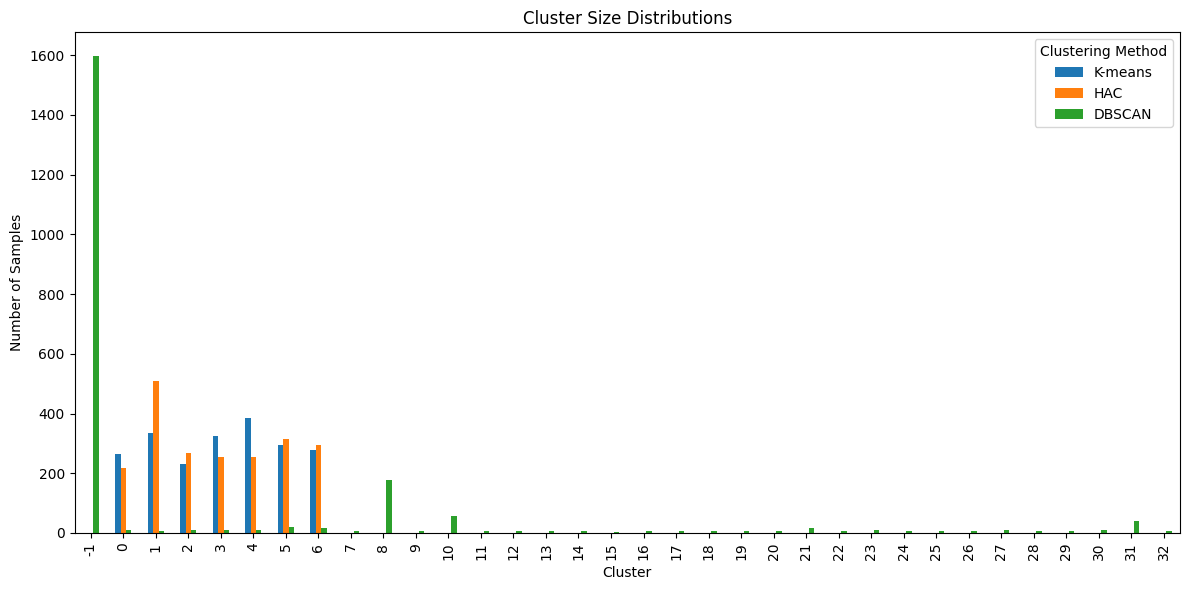

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load and preprocess the data
df = pd.read_csv(r"C:\Users\Psycho Doc\Downloads\estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition\ObesityDataSet_raw_and_data_sinthetic.csv")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = pd.factorize(df[col])[0]

# Select features for clustering
features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Hierarchical Agglomerative Clustering
hac = AgglomerativeClustering(n_clusters=7)
hac_labels = hac.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Calculate silhouette scores
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
hac_silhouette = silhouette_score(X_scaled, hac_labels)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)

print("Silhouette Scores:")
print(f"K-means: {kmeans_silhouette:.4f}")
print(f"HAC: {hac_silhouette:.4f}")
print(f"DBSCAN: {dbscan_silhouette:.4f}")

# Visualize clustering results (using first 3 features)
fig = plt.figure(figsize=(15, 5))

# K-means
ax1 = fig.add_subplot(131, projection='3d')
scatter1 = ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=kmeans_labels, cmap='viridis')
ax1.set_title('K-means Clustering')
plt.colorbar(scatter1)

# HAC
ax2 = fig.add_subplot(132, projection='3d')
scatter2 = ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=hac_labels, cmap='viridis')
ax2.set_title('Hierarchical Agglomerative Clustering')
plt.colorbar(scatter2)

# DBSCAN
ax3 = fig.add_subplot(133, projection='3d')
scatter3 = ax3.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=dbscan_labels, cmap='viridis')
ax3.set_title('DBSCAN Clustering')
plt.colorbar(scatter3)

plt.tight_layout()
plt.savefig('clustering_results.png')
plt.show()



# Compare cluster distributions
cluster_distributions = pd.DataFrame({
    'K-means': pd.Series(kmeans_labels).value_counts().sort_index(),
    'HAC': pd.Series(hac_labels).value_counts().sort_index(),
    'DBSCAN': pd.Series(dbscan_labels).value_counts().sort_index()
})

print("\nCluster Distributions:")
print(cluster_distributions)

# Visualize cluster distributions
cluster_distributions.plot(kind='bar', figsize=(12, 6))
plt.title('Cluster Size Distributions')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.legend(title='Clustering Method')
plt.tight_layout()
plt.savefig('cluster_distributions.png')
plt.show()

